# Problem Set 1 (20 + 40 + 30 = 90 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

4. Some tasks in this assignment are bonus. It means that you can get maximum score for this assignment even if you ignore these tasks. However, if you get $y$ points for bonus tasks and $x$ points for regular tasks, then your score for the assignment will be $\min(90, x+y)$. If $x + y > 90$, then we will label your submission and take into account in the final grade releasing (e.g. in the border case).

## Problem 1. QR backpropagation (20 pts)

Our goal is to write an orthogonalization layer, that for an arbitrary rectangular matrix $A$ produces an orthonormal matrix $Q$ and (optionally) an upper triangualr matrix $R$ such that $A = QR$. 
In other words, we need to compute the QR decomposition.

There are problems when one need to optimize over orthogonal matrices, so using such layer can be a solution.

A standard algorithm to compute the QR decomposition is the Gram-Schmidt process.
For the linearly independent set of vectors $a_1,\dots,a_n$ (that are defined with the matrix $A$) it computes matrix $Q$ that contains orthonormalized set of vectors $q_1,\dots,q_n$.

This algorithm is listed below.

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Obtained $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to make the system orthonormal you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.

We have $A = QR$. 
Matrix $Q$ consists of vectors $u_1, \dots, u_n$. 
Now let's look at the matrix $R$. 

$Q^*A = R$. 
So $R_{i, j} = (u_i, v_j)$ (assuming $u_i$ is already normalized). 
And it is exactly what we see in Gram-Schmidt algorithm:

$$ v_n = \frac{(v_n, u_1)}{(u_1, u_1)} u_1 + \frac{(v_n, u_2)}{(u_2, u_2)} u_2 + \dots + \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1} + u_n.$$ 

This is the representation of vectors $v_i$ in our newly computed ortonormal basis. 
Thus they form matrix $R$. 
These coefficients are in the upper triangular part of $R$, because when $i>j$ we get $R_{i j} = 0$, because then we get sum of scalar products of orthogonal vectors. 

There is a more [computationally stable version of the Gram-Schmidt algorithm](https://en.wikipedia.org/wiki/Gram–Schmidt_process#Numerical_stability) that reduces the loss of orthogonality in matrix $Q$. 
This algorithm is called the modified Gram-Schmidt algorithm.

The loop of orthogonalization is the same, except for the computing the vector $u_k$ simultaneously:

$$ u_n = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}
u_n$$

$$ 
 = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1},
$$

one need to iteratively update $u_k$ step-by-step for a better numerical stability.

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$


You are supposed to do the following tasks:

__1.__ (2 points) Implement the modified Gram-Schmidt algorithm in a function ```modified_gram_schmidt(A)``` using PyTorch.

__2.__ (1 point) Create a random matrix $A \in \mathbb{R}^{m \times n}$, $m \gg n$. For the arbitrary loss function, eg. $L(Q) = \sum_{i=0}^{m-1}\sum_{j=0}^{n-1} q_{ij}$, compute the gradient $\frac{\partial L}{\partial Q}$. Finally, compute $\frac{\partial L}{\partial A}$ using built-in PyTorch backpropagation through your implementation of QR decomposition (```modified_gram_schmidt(A)```).

__3.__ (2 points) Compute gradient $\frac{\partial L}{\partial A}$ using backpropagation through built-in PyTorch function for computing QR decomposition.

In [ ]:
# install dependencies
# !pip install memory-profiler
%reload_ext memory_profiler
from memory_profiler import profile
import torch

def modified_gram_schmidt(A):
    """
    Computes QR decomposition of matrix A
    
    Input: 
        A - n x m matrix
    Output:
        Q - n x m orthonormal matrix
        R - m x m upper triangular matrix
    """
    
    # Your code here
    m,n = A.shape

    Q = torch.zeros((m,n))
    R = torch.zeros((n,n))

    for i in range(n):
        Q[:,i] = A[:,i].clone()
        for j in range(i):
            Q[:,i] = Q[:,i].clone() - Q[:,i].clone().dot(Q[:,j].clone()) * Q[:,j].clone()
            R[j,i] = Q[:,j].clone().dot(A[:,i].clone())
        Q[:,i] = Q[:,i].clone() / torch.linalg.norm(Q[:,i].clone())
        R[i,i] = Q[:,i].clone().dot(A[:,i])

    return Q, R

m = 100
n = 20
A = torch.rand((m, n)).requires_grad_()

# Your code is below
Q1, R1 = torch.linalg.qr(A) # torch version
Q2, R2 = modified_gram_schmidt(A) # modified_gram_schmidt

print('Comparing methods: ',torch.allclose(Q1 @ R1,Q2 @ R2,atol=1e-6))
print('Comparing implemented method and matrix A: ',torch.allclose(A,Q1 @ R1,atol=1e-6))
print('Comparing torch method and matrix A:',torch.allclose(A,Q2 @ R2,atol=1e-6))

print('Difference between methods:', float(torch.linalg.norm(Q1@R1 - Q2 @ R2)))

loss1 = Q1.sum()
loss2 = Q2.sum()


# TODO compute gradients

dL_dQ1 = torch.autograd.grad(loss1,Q1)
dL_dQ2 = torch.autograd.grad(loss2,Q2)

print('\nresults for dL/dQ')
print(f'torch method: \n{dL_dQ1}')
print(f'implemented method: \n{dL_dQ2}')

loss1.backward()

dL_dA1 = A.grad.clone().detach()

A.grad.zero_()

loss2.backward()

dL_dA2 = A.grad.clone().detach()

print('\ndL/dA results')
print(f'torch method: \n{dL_dA1}')
print(f'implemented method: \n{dL_dA2}')

print('Difference between gradients:', float(torch.linalg.norm(dL_dA1 - dL_dA2)))

Comparing methods:  True
Comparing implemented method and matrix A:  True
Comparing torch method and matrix A: True
Difference between methods: 1.195513777929591e-05

results for dL/dQ
torch method: 
(tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]),)
implemented method: 
(tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]),)

dL/dA results
torch method: 
tensor([[-0.0260, -0.2804, -0.2922,  ..., -0.0006,  0.0086,  0.0068],
        [ 0.2022,  0.0540,  0.4330,  ...,  0.0407,  0.0488,  0.0423],
        [ 0.2042,  0.2644, -0.0671,  ..., -0.0304, -0.0321, -0.0338],
        ...,
        [-0.

In [ ]:
print('Comparing torch method and matrix A:',torch.allclose(A,Q1 @ R1,atol=1e-6))
print('Comparing implemented method and matrix A:',torch.allclose(A,Q2 @ R2,atol=1e-6))
print('Verifying Q.T Q = I for torch method:',torch.allclose(torch.eye((Q1.T @ Q1).shape[0]),Q1.T @ Q1,atol=1e-6))
print('Verifying Q.T Q = I for implemented method:',torch.allclose(torch.eye((Q2.T @ Q2).shape[0]),Q2.T @ Q2,atol=1e-6))

Comparing torch method and matrix A: True
Comparing implemented method and matrix A: True
Verifying Q.T Q = I for torch method: True
Verifying Q.T Q = I for implemented method: True


__4.__ (13 points total) Write the backpropagation $\frac{\partial L}{\partial A}$ from scratch with PyTorch. Do not forget to use ```requires_grad=False``` to disable PyTorch autograd accumulation of the gradient.

  a) (2 points) Derive analytically the gradient $\frac{\partial y}{\partial x}$ of vector normalization operation $y := x/\|x\|$.

  b) (1 point) Implement backward through the vector normalization operation (can be implemented either in the function ```backward_normalization``` or further inside the code).

  c) (2 points) Derive analytically the gradient $\frac{\partial u_k}{\partial v_j}$ of the othonormalization operation:

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$

  d) (2 points) Implement backward through the othonormalization operation (can be implemented either in the function ```backward_orthogonalization``` or further inside the code).

  e) (1 point) Implement the QR forward pass (almost identically to ```modified_gram_schmidt```, but with storing the additional data nesessary for backpropagation) with the method ```forward``` of class ```QR``` (see template below).

  f) (5 points) Implement the QR backward pass using previously implemented functions and place it in the method ```backward``` of class ```QR```  (see template below).

__5.__ (2 points) Look at obtained $Q$ and $R$ matrices for each approach (steps 2, 3, 4), verify that $A \approx QR$ and $Q^TQ \approx I$. Measure the required memory for backpropagation (eg. with ```memory_profiler```). 
Compare the results of three approaches: 

- gradient from the PyTorch built-in function
- gradient from PyTorch autograd applied to your function ```modified_gram_schmidt```
- your custom implementation of backward step from analytical expressions. 

Compare the theoretical asymptotics of the memory usage for the backpropagation of the modified Gram-Schmidt algorithm with every approach listed above. 
What data is needed for backpropagation and thus affects the memory consumption?

### Your solution
$\frac{\partial y}{\partial x} = \frac{\partial \frac{x}{||x||}}{\partial x} = \frac{\frac{\partial x}{\partial x} \cdot ||x||-x \cdot \frac{\partial ||x||}{\partial x}}{(x,x)} = \frac{I \cdot||x||-x \cdot x^{T} \cdot \frac{1}{||x||}}{(x,x)} = \frac{I \cdot {||x||}^{2} - x \cdot x^{T}}{||x||\cdot(x,x)} = \frac{1}{||x||}\cdot I - \frac{x \cdot x^{T}}{||x||\cdot(x,x)}$
<br>

Proof for $ \frac{\partial ||x||}{\partial x} =  \frac{1}{||x|| }\cdot x^{T} $ : 
<br>

$ ||x|| = \sqrt{x_1^2 + x_2^2 + ... +x_n^2} $ <br>

$\frac{\partial \sqrt{x_1^2 + x_2^2 + ... +x_n^2}}{\partial x} = \left[ \frac{\partial \sqrt{x_1^2 + x_2^2 + ... +x_n^2}}{\partial x_1}, \frac{\partial\sqrt{x_1^2 + x_2^2 + ... +x_n^2}}{\partial x_2}, ...,  \frac{\partial\sqrt{x_1^2 + x_2^2 + ... +x_n^2}}{\partial x_n} \right] = \frac{1}{||x||}\cdot\left[ x_1,x_2, ..., x_n \right] = \frac{1}{||x||} \cdot x^{T}$

---

$u_k = v_k - \frac{(v_k,u_1)}{(u_1,u_1)}\cdot u_1 - \frac{(v_k,u_2)}{(u_2,u_2)}\cdot u_2 - \frac{(v_k,u_{k-1})}{(u_{k-1},u_{k-1})}\cdot u_{k-1} = v_k - \sum_{i=1}^{k-1} \frac{(v_k,u_i)}{(u_i,u_i)}\cdot u_i  $

$\frac{\partial u_k}{\partial v_j} = \frac{\partial v_k}{\partial v_j} - \sum_{i=1}^{k-1}{\frac{\partial}{\partial v_j}\frac{(v_k,u_i)}{(u_i,u_i)}\cdot u_i} $
<br>

$\frac{\partial u_k}{\partial v_j} = \frac{\partial v_k}{\partial v_j} - \sum_{i=1}^{k-1}{\left[\frac{(v_k,u_i)}{(u_i,u_i)}\cdot \frac{\partial u_i}{\partial v_j} + u_i\cdot \frac{\partial}{\partial v_j}\frac{(v_k,u_i)}{(u_i,u_i)}\right]} $
<br>

$\frac{\partial u_k}{\partial v_j} = \frac{\partial v_k}{\partial v_j} - \sum_{i=1}^{k-1}{\left[\frac{(v_k,u_i)}{(u_i,u_i)}\cdot \frac{\partial u_i}{\partial v_j} + u_i\cdot \frac{\partial}{\partial u_i}\frac{(v_k,u_i)}{(u_i,u_i)}\cdot \frac{\partial u_i}{\partial v_j}\right]}  $
<br>

Let's find $\frac{\partial}{\partial u_i}\frac{(v_k,u_i)}{(u_i,u_i)} $ :
<br>

$\frac{\partial}{\partial u_i}\frac{(v_k,u_i)}{(u_i,u_i)} = \frac{\frac{\partial (v_k,u_i)}{\partial u_i} \cdot (u_i,u_i) - (v_k,u_i)\cdot\frac{\partial (u_i,u_i)}{\partial u_i}}{(u_i,u_i)^2} = \frac{v_k^T \cdot (u_i,u_i) - (v_k,u_i)\cdot 2u_i^T}{(u_i,u_i)^2} = \frac{v_k^T}{(u_i,u_i)} - 2u_i^T\cdot\frac{(v_k,u_i)}{(u_i,u_i)^2}$
<br>

Then the resulting $\frac{\partial u_k}{\partial v_j} $:
<br>

$\frac{\partial u_k}{\partial v_j} = \frac{\partial v_k}{\partial v_j} - \sum_{i=1}^{k-1}{\left[\left(\frac{(v_k,u_i)}{(u_i,u_i)}\cdot I + u_i\cdot \frac{\partial}{\partial u_i}\frac{(v_k,u_i)}{(u_i,u_i)}\right)\cdot \frac{\partial u_i}{\partial v_j}\right]} = \frac{\partial v_k}{\partial v_j} - \sum_{i=1}^{k-1}{\left[\left(\frac{(v_k,u_i)}{(u_i,u_i)}\cdot I + \frac{u_i \cdot v_k^T}{(u_i,u_i)} - 2u_i\cdot u_i^T\cdot \frac{(v_k,u_i)}{(u_i,u_i)^2}\right)\cdot \frac{\partial u_i}{\partial v_j}\right]}$
<br>

Also, the above formulae makes sense if j < k. In case j > k $\frac{\partial u_k}{\partial v_j} = 0$ and if j=k:
<br>

$\frac{\partial u_k}{\partial v_k} = I - \sum_{i=1}^{k-1}{\frac{\partial}{\partial v_k}\frac{(v_k,u_i)}{(u_i,u_i)}\cdot u_i} = I - \sum_{i=1}^{k-1}{\frac{u_i \cdot u_i^T }{(u_i,u_i)}} $
<br>

Therefore,the final result is:
<br>

$ \frac{\partial u_k}{\partial v_j} = \begin{cases} - \sum_{i=1}^{k-1}{\left[\left(\frac{(v_k,u_i)}{(u_i,u_i)}\cdot I + \frac{u_i \cdot v_k^T}{(u_i,u_i)} - 2u_i\cdot u_i^T\cdot \frac{(v_k,u_i)}{(u_i,u_i)^2}\right)\cdot \frac{\partial u_i}{\partial v_j}\right]} & , j<k \\  I - \sum_{i=1}^{k-1}{\frac{u_i \cdot u_i^T }{(u_i,u_i)}}  & , j=k \\ 0 & , j > k \end{cases} $

The obtained formulas may be rewritten as:
<br>

$ \frac{\partial u_k}{\partial v_j} = \begin{cases} \sum_{i=1}^{k-1}D_{k,i}\cdot \frac{\partial u_i}{\partial v_j} & , j<k \\ D_{k-1,k-1} - \frac{u_{k-1} \cdot u_{k-1}^T }{(u_{k-1},u_{k-1})}  & , j=k \\ 0 & , j > k \end{cases} $
<br>

where:
<br>

$ D_{k,i} =  -\left(\frac{(v_k,u_i)}{(u_i,u_i)}\cdot I + \frac{u_i \cdot v_k^T}{(u_i,u_i)} - 2u_i\cdot u_i^T\cdot \frac{(v_k,u_i)}{(u_i,u_i)^2}\right) , D_{1,1} = I$

<br>
If there are any doubts about the derivatives match in case of using ordinary gram-schmidt and modified gram-schmidt, I can prove that there are equal.

In [ ]:
def backward_normalization(mat_of_vec):
    # Your code 
    m,n = mat_of_vec.shape
    result = torch.zeros((n,m,m))
    for i in range(n):
        vec = mat_of_vec[:,i].reshape((-1,1))
        current = torch.eye(vec.shape[0]) / torch.linalg.norm(vec) - vec @ vec.T / torch.linalg.norm(vec)**3
        result[i] = current
    return result

def backward_orthogonalization(u_vec_mat,v_vec_mat):
    # Your code 
    m,n = u_vec_mat.shape
    du_dv = torch.zeros((n,n,m,m))

    du_dv[0,0] = torch.eye(m)

    # Computing all D for future use

    D = torch.zeros((n,n,m,m))
    D[0,0] = torch.eye(m,m)
    
    for k in range(1,n):
        for i in range(n):
            if k >= i:
                u_vec = u_vec_mat[:,i].reshape((-1,1))
                v_vec = v_vec_mat[:,k].reshape((-1,1))
                D[k,i] = - v_vec.T @ u_vec/(u_vec.T @ u_vec) * torch.eye(m) - u_vec @ v_vec.T/(u_vec.T @ u_vec) + 2 * u_vec @ u_vec.T * (v_vec.T @ u_vec)/(u_vec.T @ u_vec)**2

    for k in range(1,n):
        for j in range(n):
            if k == j:
                u_vec_1 = u_vec_mat[:,k-1].reshape((-1,1))
                du_dv[k,j] = du_dv[k-1,k-1] - u_vec_1 @ u_vec_1.T / (u_vec_1.T @ u_vec_1)
            elif j < k:
                for i in range(j,k):
                    du_dv[k,j] += D[k,i] @ du_dv[i,j]
    return du_dv

class QR():
    def forward(self, A):
        """
        Computes QR decomposition of matrix A

        Input: 
            A - n x m matrix
        Output:
            Q - n x m orthonormal matrix
            R - m x m upper triangular matrix
        """
        m,n = A.shape
        self.A = A.clone()

        Q = torch.zeros((m,n))
        R = torch.zeros((n,n))

        for i in range(n):
            Q[:,i] = A[:,i].clone()
            for j in range(i):
                Q[:,i] = Q[:,i].clone() - Q[:,i].clone().dot(Q[:,j].clone())/Q[:,j].clone().dot(Q[:,j].clone()) * Q[:,j].clone()

                R[j,i] = (Q[:,j].clone()/torch.linalg.norm(Q[:,j].clone())).dot(A[:,i].clone())

            R[i,i] = (Q[:,i].clone()/ torch.linalg.norm(Q[:,i].clone())).dot(A[:,i])

        self.not_normalized_vecs = Q.clone()

        Q = Q / torch.linalg.norm(Q,dim=0)

        self.Q = Q.clone()
    
        return Q, R
        

    def backward(self, grad_output):
        """
        Computes QR decomposition of matrix A

        Input: 
            grad_output - n x m matrix, derivative of the previous layer (derivative of loss dL/dQ  in our case)
        Output:
            grad_input - n x m derivative dL/dA
        """
        m,n = self.Q.shape
        norm_grad = backward_normalization(self.not_normalized_vecs)
        ortog_grad = backward_orthogonalization(self.not_normalized_vecs,self.A)
        self.norm_ortog_derivatives = torch.zeros(n,n,m,m)
        for k in range(n):
            for j in range(n):
                self.norm_ortog_derivatives[k,j] = norm_grad[k] @ ortog_grad[k,j]

        grad_input = torch.zeros(m,n)
        # Your code
        for j in range(n):
            grad_j = torch.zeros(m)
            for k in range(n):
                grad_j += grad_output[:,k] @ norm_grad[k] @ ortog_grad[k,j]
            grad_input[:,j] = grad_j
        return grad_input

In [ ]:
qr = QR()
A = torch.rand((m, n),requires_grad=True)

Q, R = qr.forward(A)
loss1 = Q.sum()

# TODO compute losses and do backpropagation
# compute dL / dQ and finally dL / dA
grad_output = torch.autograd.grad(loss1,Q)[0]
dL_dA = qr.backward(grad_output)


A_autograd = A.clone().detach().requires_grad_(True)
Q_autograd, R_autograd = qr.forward(A_autograd)
loss2 = Q_autograd.sum()
loss2.backward()
print('Difference between gradients:', float(torch.linalg.norm(dL_dA - A_autograd.grad)))


Difference between gradients: 5.902566044824198e-06


In [ ]:
m = 100
n = 20
A_mem = torch.rand((m, n)).requires_grad_()

# Your code is below
Q1_mem, R1_mem = torch.linalg.qr(A_mem) # torch version
Q2_mem, R2_mem = modified_gram_schmidt(A_mem) # modified_gram_schmidt

loss1_mem = Q1_mem.sum()
loss2_mem = Q2_mem.sum()


In [ ]:
%mprun -f torch.autograd.grad torch.autograd.grad(loss1_mem,A_mem)


Filename: c:\Users\denis\anaconda3\lib\site-packages\torch\autograd\__init__.py

Line #    Mem usage    Increment  Occurences   Line Contents
   201    387.5 MiB    387.5 MiB           1   def grad(
   202                                             outputs: _TensorOrTensors,
   203                                             inputs: _TensorOrTensors,
   204                                             grad_outputs: Optional[_TensorOrTensors] = None,
   205                                             retain_graph: Optional[bool] = None,
   206                                             create_graph: bool = False,
   207                                             only_inputs: bool = True,
   208                                             allow_unused: bool = False,
   209                                             is_grads_batched: bool = False
   210                                         ) -> Tuple[torch.Tensor, ...]:
   211                                             r"""Computes

In [ ]:
%mprun -f torch.autograd.grad torch.autograd.grad(loss2_mem,A_mem)


Filename: c:\Users\denis\anaconda3\lib\site-packages\torch\autograd\__init__.py

Line #    Mem usage    Increment  Occurences   Line Contents
   201    411.1 MiB    411.1 MiB           1   def grad(
   202                                             outputs: _TensorOrTensors,
   203                                             inputs: _TensorOrTensors,
   204                                             grad_outputs: Optional[_TensorOrTensors] = None,
   205                                             retain_graph: Optional[bool] = None,
   206                                             create_graph: bool = False,
   207                                             only_inputs: bool = True,
   208                                             allow_unused: bool = False,
   209                                             is_grads_batched: bool = False
   210                                         ) -> Tuple[torch.Tensor, ...]:
   211                                             r"""Computes

In [ ]:
qr = QR()
A = torch.rand((m, n),requires_grad=True)

Q, R = qr.forward(A)
loss1 = Q.sum()

# TODO compute losses and do backpropagation
# compute dL / dQ and finally dL / dA
grad_output = torch.autograd.grad(loss1,Q)[0]


In [ ]:
%memit qr.backward(grad_output)

peak memory: 500.75 MiB, increment: 104.87 MiB


From the achieved results for memory consumption, it may be concluded that the memory consumption is the highest in case of using implemented algorithm, which is obvious, as it is not very memory optimal. Using torch function qr and torch backward for it on the other hand has the best results among the methods, when speaking about the memory consumption. 


For the back propagation we need to compute and store the vectors, achieved after the orthogonalization to perform backward on normalization and orthogonalization operations. Also we need to store the values of $ D_{k,i} $ that were computed on previous steps, which significantly rises the amount of memory needed during the backward.
<br>

For lowering the memory consumption one may consider using recursive algorithm for computing the backward pass.

### Bonus tasks

__6.__ (10 points) Modify the previous code to be memory-efficient. 

Hint: not all intermediate variables need to be stored for backpropagation.

__7.__ (3 points) Again, measure the required memory for backpropagation. Explain the theoretical asymptotics of the memory usage for the memory-efficient backpropagation.

In [ ]:
# Your solution is here

## Problem 2. Voice classification (40 pts)

In this assigment you will have a chance to develop a voice-anti-spoofing algorithm, enhancing your skills in standard PyTorch classificaton development pipeline.

There are several types of attack: 
- replay attacks, when one records and repeats someone's voice, 
- impresario attacks, when the speaker mimics the target's voice like an actor and 
- the most interesting are deepfake attack, based on text-to-speech, voice cloning and voice conversion algorithms. 

In this work we will focus on deepfake attack and try to differ them from genuine (or bona-fide) speech.

We will use data, provided by organisers of biannual [ASVspoof](https://www.asvspoof.org/) contest. More precisely, we will take subpart `ASVspoof_2019LA` dataset, which consist of 17 different attacks DF attack types and bona-fide. All recordings were augmented to be close to real telephone recordings. We will not take 2021 data, but if you want, you can use 2021 data as test and 2019 data as train and validation.

The initital dataset can be downloaded from [here](https://datashare.ed.ac.uk/handle/10283/3336). However, we [provide you smaller subsample](https://drive.google.com/drive/folders/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx?usp=share_link) of dev (val) and eval (test) parts to make work in colab relatively possible :) . You can download it locally or put into you Drive. You will need around 3GB free space, think about creating a new account if you don't have enough.

We encourage you to look through data [overview](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_evaluation_plan.pdf?sequence=1&isAllowed=y) and result summary [paper](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_Interspeech2019_submission.pdf?sequence=2&isAllowed=y).

One important thing to notice: main application of this algorithms is in voice-biometry, when we want to stop illegal intruder. Thus, there are two (or 3) common ways of developing VAS algorithms: speaker-aware, we we train verification model which is sensitive to spoofing and differs bona-fide and impostor or we combinde verification score and score of VAS model to decide, whetherr the person is the same, and finally simple and general countermeasures setup, when given audio and model should predict whether it is a spoof or bona-fide. We will work on the last setup.

**Important: feel free not to use pre-defined functions, you can solve the task as you wish or change functions/pipelines significantly.** 

#### Preparations
It is a good practice to log and check you experiments. In this assignemnt, we ask you to sign up in wandb, log your experiments and give us a link to your project and attach plots/report in the notebook with your solution.

In [1]:
!pip install wandb

import copy
import os
import sys
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython.display as ipd
from typing import Optional
import torch
import torch.nn as nn
import torchaudio
# import librosa
import sklearn.metrics as metrics
import wandb
from torchvision.models import resnet50, resnet18, ResNet50_Weights
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import sigmoid
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# https://wandb.ai/quickstart

!wandb login  # and paste your API key from https://wandb.ai/authorize

wandb: Currently logged in as: lone_wayfarer (dl_sk23). Use `wandb login --relogin` to force relogin


In [3]:
wandb.init(project="voice-anti-spoofing", name = "test_run", tags = ["SmallModel", "LA"])
SEED = 42  # do not change it
# mount drive if you wish

from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/

wandb: Currently logged in as: lone_wayfarer (dl_sk23). Use `wandb login --relogin` to force relogin


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


In [4]:
!ls for_colab

ASVspoof2019_LA_cm_protocols  df_eval.csv   flac_dev   README.LA.txt
df_dev.csv		      df_train.csv  flac_eval  train_flac


In [5]:
# to make dataframes
path_la_train = "for_colab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
path_la_dev = "for_colab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt"
path_la_eval = "for_colab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt"

flac_la_train = "for_colab/train_flac/"
flac_la_dev = "for_colab/flac_dev/"
flac_la_eval = "for_colab/flac_eval/"

In [6]:
columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
df = pd.read_csv(path_la_train, sep=" ", header=None)
df.columns = columns
df.head()

,speaker_id,audio_file_name,system_id,skip,class
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


In [7]:
def makedf_ultimate(txt_file_path, flac_path, dataset_name='ASVspoof', data_type='LA', year=2019):
    
    if dataset_name=='ASVspoof':
        name = dataset_name+str(year)+data_type
        if data_type=='DF':
            attack_name = 'deepfake'
        elif data_type=='LA':
            attack_name = 'deepfake'
        else:
            attack_name = 'replay'
            
        df = pd.read_csv(txt_file_path, sep=" ", header=None)

            
        if year == 2019:
            df.columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
            df['dataset'] = name
            di = {'bonafide':0, 'spoof':1} # assign classes

            df['class'] = df['class'].map(di)
            # m = df['class'] == 0
            # df.loc[m, 'attack'] = 'noattack'
            df['audio_path'] = flac_path + df['audio_file_name'] + '.flac'
            df = df[["speaker_id", "audio_path", "class"]]
        
    # df = df[['audio_path', 'class', 'dataset', 'attack']]
    df = df[["speaker_id", "audio_path", "class"]]
    df = df.reset_index(drop=True)
    return df

In [8]:
df_train = makedf_ultimate(path_la_train, flac_la_train, year=2019, data_type='LA')
df_dev = makedf_ultimate(path_la_dev, flac_la_dev, year=2019, data_type='LA')
df_eval = makedf_ultimate(path_la_eval, flac_la_eval, year=2019, data_type='LA')

In [9]:
print('Data distribution in df_train:\n',df_train['class'].value_counts())
print('Data distribution in df_dev:\n',df_dev['class'].value_counts())
print('Data distribution in df_eval:\n',df_eval['class'].value_counts())

Data distribution in df_train:
 1    22800
0     2580
Name: class, dtype: int64
Data distribution in df_dev:
 1    22296
0     2548
Name: class, dtype: int64
Data distribution in df_eval:
 1    63882
0     7355
Name: class, dtype: int64


In [10]:
alpha = df_train['class'].value_counts()[0] / df_train['class'].value_counts()[1]

In [11]:
alpha # To take later into account,when defining criterion

0.11315789473684211

**Task 1.1 (2 points)** Check data distribution. Is it imbalanced? How are you going to deal with it?

Hints: upsampling, downsampling, add new data, e.g. from this [source](https://commonvoice.mozilla.org/) (but will new audios have the same distribution?), or adjust loss functions.

**Answer**:

The classes are imbalanced, therefore we need to somehow deal with it. I will further adjust the loss functions to take into the account the imbalanced nature of the data.

In [12]:
# for dev and eval, let's simplify the task and use smaller amount of data, but balanced to better understand metrics
# we need this functions, because it removes unuploaded data from our dataframes
def balanced_split(df):
    k = min(len(df[df['class']==0]), len(df[df['class']==1]))
    print(k)
    df_bf = df[df['class']==0].sample(frac=1, random_state=SEED).iloc[0:k]
    df_spoof = df[df['class']==1].sample(frac=1, random_state=SEED).iloc[0:k]

    df_bf = df_bf.append([df_spoof], ignore_index=True)
    df_bf = df_bf.reset_index(drop=True)
    return df_bf

df_eval = balanced_split(df_eval)
df_dev = balanced_split(df_dev)

7355
2548


<ipython-input-12-295d12be0fb0>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bf = df_bf.append([df_spoof], ignore_index=True)


In [13]:
# for audio manipulations we advise you to use torchaudio or librosa
x, sr = torchaudio.load(df_eval["audio_path"].iloc[0])

In [14]:
ipd.display(ipd.Audio(x, rate=sr))

**Task 1.2. (1 point)** Display several spoof and bona-fide audios. Can you hear the difference?

In [15]:
df_eval

,speaker_id,audio_path,class
0,LA_0063,for_colab/flac_eval/LA_E_2714189.flac,0
1,LA_0034,for_colab/flac_eval/LA_E_8624167.flac,0
2,LA_0041,for_colab/flac_eval/LA_E_6677864.flac,0
3,LA_0031,for_colab/flac_eval/LA_E_1357107.flac,0
4,LA_0032,for_colab/flac_eval/LA_E_7531986.flac,0
...,...,...,...
14705,LA_0019,for_colab/flac_eval/LA_E_6594661.flac,1
14706,LA_0010,for_colab/flac_eval/LA_E_4448653.flac,1
14707,LA_0020,for_colab/flac_eval/LA_E_2208441.flac,1
14708,LA_0006,for_colab/flac_eval/LA_E_2754179.flac,1


In [16]:
### Your code is here
x, sr = torchaudio.load(df_eval["audio_path"].iloc[1])
ipd.display(ipd.Audio(x,rate=sr))
x, sr = torchaudio.load(df_eval["audio_path"].iloc[2])
ipd.display(ipd.Audio(x,rate=sr))
x, sr = torchaudio.load(df_eval["audio_path"].iloc[3])
ipd.display(ipd.Audio(x,rate=sr))
x, sr = torchaudio.load(df_eval["audio_path"].iloc[14705])
ipd.display(ipd.Audio(x,rate=sr))
x, sr = torchaudio.load(df_eval["audio_path"].iloc[14706])
ipd.display(ipd.Audio(x,rate=sr))
x, sr = torchaudio.load(df_eval["audio_path"].iloc[14707])
ipd.display(ipd.Audio(x,rate=sr))

Definitely can hear the difference. In the second case the audios are synthesized

### Custom dataset and Model

You can find inspiration and hints in 
- https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html
- https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
- https://pytorch.org/tutorials/beginner/fgsm_tutorial.html
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
- https://pypi.org/project/audiomentations/ 
- https://pytorch.org/audio/stable/tutorials/audio_data_augmentation_tutorial.html
- and any other blogposts about spectrograms

**Task 2.1 (5 points)** We can work with audios as with images, transforming into spectrograms. Here your task is to implement simple model, which receives raw wav (amplitudes, but probably already preprocced in dataset), transforms it into mel-spectrogram, changes amplitude to DB scale (if you want) and then procceses through the layers. You are free to use ready pre-trained backbones, e.g. from `torchvision.models` and fine-tune them. However, if you want to practise more, create something on your own. Large models with `requires_grad=True` for all parameters will probably result in problems on training in colab. 

In [17]:
import torchaudio.transforms as T
class WavResNet(nn.Module):
    def __init__(self, classes=None, resample=16000, n_mels=80, melspec_config=None):
        super().__init__()
        self.fbank = T.MelSpectrogram(n_mels=n_mels,sample_rate=resample)
        self.to_db = T.AmplitudeToDB()
        
        model = resnet50(weights=ResNet50_Weights.DEFAULT)
        model.conv1 = nn.Conv2d(1,64,3,padding=1)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, classes)
        self.network = model
        # or create your own layers and use them in forward pass
        
    
    def forward(self, x, wav_lens: Optional[torch.Tensor]=None):  # can check the length if you want. this is helpful for inference
        mels = self.fbank(x)
        mels_db = self.to_db(mels)
        # mels_db = ...
        out = self.network(mels_db)
        return out

**Task 2.2 (1 point)**
In your opinion, which approach is better for binary classification: 
- Model's last layer output has shape 1, train with BCE-like loss.
- Model's last layer output has shape 2, train with cross-entropy like loss. 

<br>

In this case I will use BCE-like loss and output of shape 1,as I think that in such case the training will be faster due to less number of parameters.

**Task 2.3 (3 points)** Create custom dataset, which recieves ```df``` and returns preprocessed audio.

**Task 2.4 (1 point)** Should we use augmentaions? If yes, which ones? 
<br>
It is one of the things, I didn't try during the completion of this HW, but it is definitely worth trying to use augmentations.

In [18]:
class DatasetWav(Dataset):

    def __init__(self, data_frame, padding_sec=4, default_sr=16000, transform=None):
        self.df = data_frame
        self.padding_sec = padding_sec
        self.default_sr = default_sr
        self.labels = data_frame['class'].values
        self.paths = data_frame['audio_path'].values
        # self.vad = ...   # in this task you are free to ommit it in order to speed up calculations,
                         # also the provided data should be rather clean
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):

        label = self.labels[idx]
        path = self.paths[idx]
        waveform , sr = torchaudio.load(path) # normalize=True
        # transform waveform from stereo to mono channel 
        waveform = torch.mean(waveform,dim=0,keepdim=True)
        resample_transform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=self.default_sr) # should we use it for our data or can ommit? 
        waveform = resample_transform(waveform)
        # waveform = self.vad(waveform)
        
        # came up with idea, what to do if audio is longer or shorter than reuqired
        req = self.padding_sec * self.default_sr
        
        if (waveform.shape[1] < req ):
          waveform = torch.cat([waveform,torch.zeros(1,req - waveform.shape[1])],dim=1)
        else:
          waveform = waveform[:,:req]
            
        return waveform, label

In [19]:
# check that works
batch_size = 8
train_dataset_wavs = DatasetWav(df_train) #.iloc[0:200]
train_dataloader_wavs = DataLoader(train_dataset_wavs, batch_size=batch_size, shuffle=True, num_workers=2)
x, y = next(iter(train_dataloader_wavs))
model = WavResNet(classes=1)
model(x)

tensor([[ 0.0052],
        [ 0.0654],
        [-0.1029],
        [-0.0060],
        [-0.0258],
        [-0.0256],
        [-0.0639],
        [ 0.0110]], grad_fn=<AddmmBackward0>)

### Train and Test functions
**Task 3.0 (1 point)** What is the difference between `model.train()` and `model.eval()`? Does `model.eval()` mode take gradient statisitcs into account?

<br>

`model.train()` and `model.eval()` switches between two state of the model. `model.train()` is used during training and affects the way how some layers of model behaves themselves(i.e. Dropout, Batchnorm etc.). As well as mentioned actions,`model.train()` also enables the computing of gradients and storing of them. <br>
`model.eval()` on the other hand switches the model in eval mode (i.e different behaviour of the BatchNorm, Dropout is used differently,suitably for evaluation). Also in case of `model.eval()` the gradients are not being computed,since there is nothing to optimize during the inference.

**Task 3.1 (5 points)** Implement train and test functions, which iterate over all batches. Do logging of loss, accuracy on each batch and after every epoch. Check equal error rate EER, explain, what is it.

In [20]:
def calculate_eer(y, y_score):
  fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)
  eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
  thresh = interp1d(fpr, thresholds)(eer)
  return eer, thresh

In [21]:
def test(model, test_dataloader, criterion=None, device=None,mode='val',thresh=0.5):
    model.to(device)
    model.eval()
    loss_list = []
    test_acc_list = []

    all_probs=np.array([])
    all_targets =np.array([])

    for data in tqdm(test_dataloader):
      input = data[0].to(device).float()
      target = data[1].to(device).float()

      out = model(input)

      loss = criterion(out.flatten(),target)
      loss_list.append(loss.detach().item())

      prob = sigmoid(out)
      prob_np = prob.cpu().detach().numpy()
      target_np = target.cpu().detach().numpy()
      if mode == 'val':
        eer,thresh = calculate_eer(target_np,prob_np)

      binaries_pred = np.where(prob_np > thresh,1,0)

      test_acc = accuracy_score(target_np,binaries_pred)
      test_acc_list.append(test_acc)

      all_probs = np.append(all_probs,prob_np)
      all_targets = np.append(all_targets,target_np)

    resulting_thresh = thresh
    if mode == 'val':
      eer,resulting_thresh = calculate_eer(all_targets,all_probs)
      

    test_loss = np.mean(loss_list)
    test_acc = np.mean(test_acc_list)

    return all_targets,all_probs,test_acc, test_loss,resulting_thresh


def train(model, dataloaders, criterion, optimizer, 
          num_epochs=3, scheduler=None, savename=None,
          print_counter=10, decay_factor=10,
          device=torch.device("cuda")):
  train_dataloader = dataloaders['train']
  val_dataloader = dataloaders['val']
  val_acc_history = []

  model = model.to(device)
  

  for epoch in tqdm(range(num_epochs)):
    model.train()
    loss_list = []
    train_acc = []

    for i,data in enumerate(train_dataloader):
      input = data[0].to(device).float()
      target = data[1].to(device).float()

      output = model(input)
      
      loss = criterion(output.flatten(),target)
      optimizer.zero_grad()
      loss.backward()

      optimizer.step()

      loss_list.append(loss.detach().item())

      prob = sigmoid(output)
      prob_np = prob.cpu().detach().numpy()
      target_np = target.cpu().detach().numpy()

      eer,thresh = calculate_eer(target_np,prob_np)

      binaries_pred = np.where(prob_np > thresh,1,0)


      batch_accuracy = accuracy_score(target_np,binaries_pred)
      train_acc.append(batch_accuracy)

      print(f'Epoch : {epoch}, Batch: {i+1} of {len(train_dataloader)}, Loss: {loss.detach().item()}, batch accuracy: {batch_accuracy} ')

      wandb.log(data={
          'train loss per batch': loss.detach().item(),
          'train accuracy per batch': batch_accuracy
      })
    
    torch.save({
        'epoch': epoch,
        'model_state': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
      }, savename)
    
    train_epoch_loss = np.mean(loss_list)
    train_epoch_acc = np.mean(train_acc)
    wandb.log(data={
          'train loss per epoch': train_epoch_loss,
          'train accuracy per epoch': train_epoch_acc
      })
    _,_,val_acc, val_loss,resulting_thresh = test(model,val_dataloader,criterion,device,mode='val')
    wandb.log(data={
          'val loss per epoch': val_loss,
          'val accuracy per epoch': val_acc
      })
    val_acc_history.append(val_acc)
    
    print(f'Epoch : {epoch}, Val Loss: {val_loss}, validation accuracy: {val_acc} ')
  
  return model,val_acc_history, resulting_thresh


### Main loop 

**Task 4.1 (3 points)** What loss will you choose and why? What it should receive for input (logits, probs)? Explain your answer.
Consider also:
- https://medium.com/swlh/focal-loss-what-why-and-how-df6735f26616
- https://libauc.org/
<br>

I will use BCEWithLogits Loss, as the output in my case is of shape 1. BCEWithLogits receives logits as an input. Also BCEWithLogits is more numerically stable than applying firstly sigmoid and then BCELoss

**Task 4.2 (5 points)** Implement main function, which receives yaml or json config (or path to it) and train and test the model, save model checkpoints, and model's test predictions. At least, you should obain results better than random. It is good, if accuracy on test dataset is >= 0.75.

In [22]:
import yaml

In [23]:
config = {'lr':1e-2,'epochs':2,'batch_size':256}

In [24]:
with open('config.yaml','w') as file:
  yaml.dump(config,file)

In [25]:
with open('config.yaml','r') as file:
  config = yaml.load(file,Loader=yaml.FullLoader)

In [26]:
config

{'batch_size': 256, 'epochs': 2, 'lr': 0.01}

In [27]:
from torch.optim import lr_scheduler
def main(config):
    lr =  config['lr']
    epochs = config['epochs']
    batch_size = config['batch_size']
    wandb.init(project="voice-anti-spoofing", name = "3st adequate(I hope) run,less data", tags = ["ResNet", "LA"])
    wandb.config = {
      "learning_rate": lr,
      "epochs": epochs,
      "batch_size": batch_size
    }

    
    # debug firstly on small subpart of dataset
    train_dataset_wavs = DatasetWav(df_train.iloc[:15000]) #.iloc[0:200]
    train_dataloader_wavs = DataLoader(train_dataset_wavs,batch_size=batch_size,shuffle=True,num_workers=2)
    
    val_dataset_wavs = DatasetWav(df_dev)
    val_dataloader_wavs = DataLoader(val_dataset_wavs,batch_size=batch_size,shuffle=True,num_workers=2)
    
    test_dataset_wavs = DatasetWav(df_eval)
    test_dataloader_wavs = DataLoader(test_dataset_wavs,batch_size=batch_size,shuffle=True,num_workers=2)
    
    dataloaders = {"train": train_dataloader_wavs, "val": val_dataloader_wavs}
    
    
    device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
    classes = 1                                         
    model = WavResNet(classes)                                                                             
    model = model.to(device)
    # freeze layers except the last one if you want
    for param in model.parameters():
      param.requires_grad = False
    model.network.fc.requires_grad_(True)
                                                                                           
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)

    scheduler = lr_scheduler.StepLR(optimizer,step_size=2,gamma = 0.001)
    

    sc = torch.tensor([alpha]).to(device) # weights for loss
    criterion = nn.BCEWithLogitsLoss(pos_weight=sc)
    
    for_ckpts = "./content/wandb/latest-run/chkp"
    os.makedirs(for_ckpts, exist_ok=True)
    
    model, val_acc_history,resulting_thresh = train(model,dataloaders,criterion,optimizer,epochs,scheduler,savename='chckpt.pt')
    
    y, probs,test_acc,test_loss,resulting_thresh = test(model,test_dataloader_wavs,criterion,device,mode='test',thresh=resulting_thresh)
    
    return y, probs, resulting_thresh, test_acc,test_loss

y, probs,resulting_thresh,test_acc,test_loss = main(config)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch : 0, Batch: 1 of 59, Loss: 0.20268484950065613, batch accuracy: 0.7109375 
Epoch : 0, Batch: 2 of 59, Loss: 0.2643290162086487, batch accuracy: 0.58203125 
Epoch : 0, Batch: 3 of 59, Loss: 0.20842404663562775, batch accuracy: 0.5078125 
Epoch : 0, Batch: 4 of 59, Loss: 0.1388673186302185, batch accuracy: 0.84375 
Epoch : 0, Batch: 5 of 59, Loss: 0.19421927630901337, batch accuracy: 0.83203125 
Epoch : 0, Batch: 6 of 59, Loss: 0.19255298376083374, batch accuracy: 0.8359375 
Epoch : 0, Batch: 7 of 59, Loss: 0.1250568926334381, batch accuracy: 0.89453125 
Epoch : 0, Batch: 8 of 59, Loss: 0.12072242796421051, batch accuracy: 0.9609375 
Epoch : 0, Batch: 9 of 59, Loss: 0.12453050911426544, batch accuracy: 0.94140625 
Epoch : 0, Batch: 10 of 59, Loss: 0.13666671514511108, batch accuracy: 0.90625 
Epoch : 0, Batch: 11 of 59, Loss: 0.12829694151878357, batch accuracy: 0.9140625 
Epoch : 0, Batch: 12 of 59, Loss: 0.11525363475084305, batch accuracy: 0.89453125 
Epoch : 0, Batch: 13 of 59,


 50%|█████     | 1/2 [02:21<02:21, 141.21s/it]

Epoch : 0, Val Loss: 0.10745573900640011, validation accuracy: 0.8014143318965518 
Epoch : 1, Batch: 1 of 59, Loss: 0.04107365012168884, batch accuracy: 0.97265625 
Epoch : 1, Batch: 2 of 59, Loss: 0.0412263385951519, batch accuracy: 0.93359375 
Epoch : 1, Batch: 3 of 59, Loss: 0.0379214882850647, batch accuracy: 0.9609375 
Epoch : 1, Batch: 4 of 59, Loss: 0.04052034020423889, batch accuracy: 0.9609375 
Epoch : 1, Batch: 5 of 59, Loss: 0.034742459654808044, batch accuracy: 0.97265625 
Epoch : 1, Batch: 6 of 59, Loss: 0.03375673294067383, batch accuracy: 0.96484375 
Epoch : 1, Batch: 7 of 59, Loss: 0.03767671436071396, batch accuracy: 0.96875 
Epoch : 1, Batch: 8 of 59, Loss: 0.0385635681450367, batch accuracy: 0.94921875 
Epoch : 1, Batch: 9 of 59, Loss: 0.034059904515743256, batch accuracy: 0.9609375 
Epoch : 1, Batch: 10 of 59, Loss: 0.03681875765323639, batch accuracy: 0.9609375 
Epoch : 1, Batch: 11 of 59, Loss: 0.0429646335542202, batch accuracy: 0.95703125 
Epoch : 1, Batch: 12 o


100%|██████████| 2/2 [04:38<00:00, 139.37s/it]


Epoch : 1, Val Loss: 0.10442117191851139, validation accuracy: 0.8166150323275861 


100%|██████████| 58/58 [01:31<00:00,  1.57s/it]


In [28]:
test_acc,test_loss

(0.7759568143629456, 0.11528833300389092)

Training might require a long time. So, you can try to use subpart of the dataset to receive rather good results. Also, you don't have to train for many epochs, 1 or even a half of epoch might be enough. Also consider to make some speedups in the model and dataset.

Colab also might work unstable with lots of data. If this happens, think how to deal with it, e.g. restart the kernel and/or remove the majority of data from Drive and try to bugfix firstly, then do train and test separately. 



**Task 4.3 (5 points)** Analyze the results. Play some audios with wrong predictions. Plot prediction distributions vs class. Is it possible to find better threshold?

**Task 4.4 (5 points)** Discuss the results and your approaches + hyperparameters. If you can, run some experiments with different parameters.

 Write your ideas, what else you can try to improve the results in the future.

 <br>

I haven't tried augmentations, but one may consider using them. Applying them may increase the variety of training data. Unfortunately I didn't have enough time to check different sets of hyperparameters, but definitely it worth trying to find the best set of them. Even for current parameters I achieved a pretty good results, but of course they still might be improved

**Task 4.5 (3 points)** Provide link to wandb project, or link to report. Upload best model's weights to Drive and provide a link with access right.


Link to wand project: https://wandb.ai/dl_sk23/voice-anti-spoofing?workspace=user-lone_wayfarer 
<br>
Link to weights: https://drive.google.com/file/d/11594fSN4jFG4r2IqspS9EaRGqMBNnRg_/view?usp=sharing

In [ ]:
#Misclassified audios

In [52]:
pred = np.where(probs > resulting_thresh,1,0)

In [53]:

x, sr = torchaudio.load(df_eval[pred != y]['audio_path'].iloc[0])

In [54]:
ipd.display(ipd.Audio(x, rate=sr))

In [55]:

x, sr = torchaudio.load(df_eval[pred != y]['audio_path'].iloc[1])

In [56]:
ipd.display(ipd.Audio(x, rate=sr))

In [57]:

x, sr = torchaudio.load(df_eval[pred != y]['audio_path'].iloc[-1])

In [58]:
ipd.display(ipd.Audio(x, rate=sr))

**Bonus task. (50 points)** 

So far, we didn't care about speaker_id and verification. Take verification model from whatever you want and create counter measure subnetwork, as described in this [article](https://sasv-challenge.github.io/pdfs/2022_descriptions/IDVoice.pdf). Train the model, as described there. ASVspoof also provides Enrollment(anchor) recordings. Try to make blending, to obtain better metrics for counter measures.

These links might be helpful:
- https://github.com/archinetai/surgeon-pytorch
- https://www.kaggle.com/code/peter0749/additive-margin-softmax-loss-with-visualization

## Problem 3. (30 pts)

### Task 1 (10 pts)

For FCNN (Fully connected Neural Networks)
\begin{equation}
f(x)=f_k\left(f_{k-1}\left(\ldots\left(f_0(x)\right)\right),\right.
\end{equation}
assume the nonlinearity function $\sigma$ is ReLU and loss function $L$ is squared error loss function.
Prove that the deep learning model is not unique for any datasets, i.e. the optimization problem 
\begin{equation}
\min_\theta \ g(\theta)=\frac{1}{N} \sum_{i=1}^N L\left(y_i, \hat{y}_i\right), \text{where} \ \ \hat{y}_i=f\left(x_i, \theta\right),
\end{equation} 
dose not have an unique global minimizer $\theta$.

### Task 2 (5 pts)

The *softmax* activation function is 
\begin{equation}
\mathrm{Softmax}(\mathbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \text { for } \  i=1, \ldots, K \text { and } \mathbf{z}=\left(z_1, \ldots, z_K\right) \in \mathbb{R}^K.
\end{equation}
Suppose $\mathbf{z} \in \mathbb{R}^K$, and $\mathbf{a} \in \mathbb{R}^K$,
Prove that for the optimization problem
\begin{equation}
\begin{aligned}
& \min_{\mathbf{a}} \ -\langle\mathbf{a}, \mathbf{z}\rangle+\langle\mathbf{a}, \log \mathbf{a}\rangle \\
& \text { s.t. } \sum_k^K \mathbf{a}_{k}=1,
\end{aligned}
\end{equation}
the minimizer is 
\begin{equation}
\mathbf{a}^*=\mathrm{Softmax}(\mathbf{z}).
\end{equation}

*Hint*: KKT optimality conditions and convexiy of the problem can help you to show the required equality

### Task 3 (15 pts)

For function $f(x)=x^2, x \in \left[0, 1\right]$, 

1) prove that the neural network $\hat f(x)$ based on the following structure has the approximation error 
\begin{equation}
|f(x)-\hat f(x)|\leq \frac{1}{2^{n-1}}
\end{equation}
where $n$ is the number of layers in the nural network.

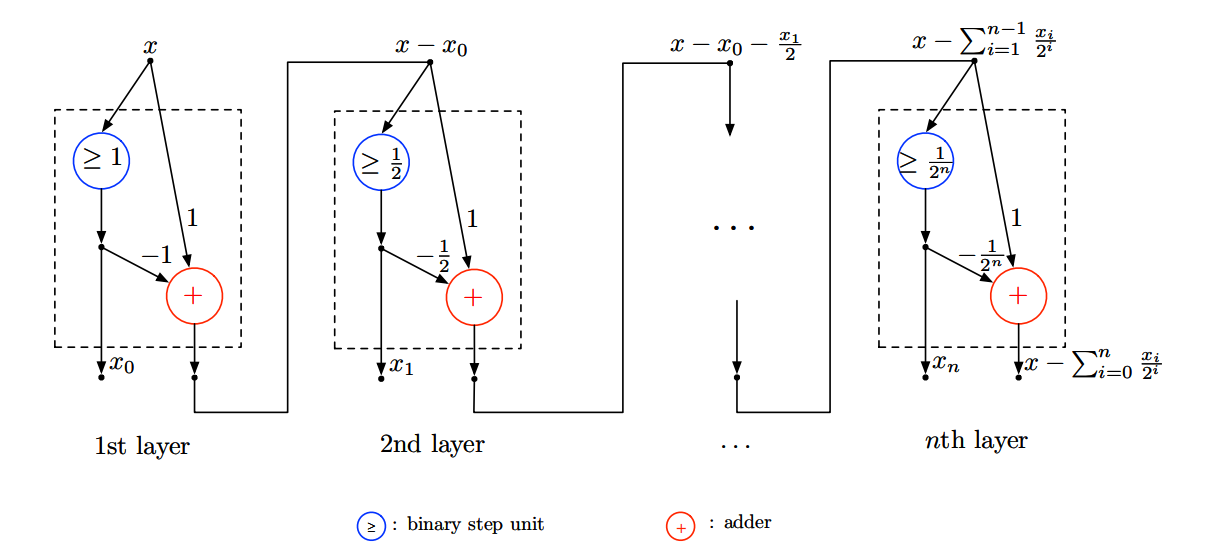

*Hint*: For each $ x \in \left[0, 1\right]$, $x$ can be denoted by its binary expansion $x=\sum_{i=0}^{∞} x_i/2^i$, where $x_i \in \{ 0, 1\}$. The above structure can be used to find $x_0,\dots, x_n$. Then we can write $\hat f(x)=f\left(\sum_{i=0}^{∞} x_i/2^i\right).$

After the proof, if we want to achieve $\epsilon$ appoximation error based on the above neural network, the number of layers $n$ has to satisfy the condition $\frac{1}{2^{n-1}}\leq \epsilon$, i.e. $n\geq \log_2 \frac{1}{\epsilon}$.

2) Implement this neural network in any framework you like with different $n$ (for example $n = 3, 5, 10, 15$), and then plot the curve for absolute errors for different $n$. Compare the obtained plots with theoretical bound.


In [ ]:
# Your solution is here